Populating the interactive namespace from numpy and matplotlib


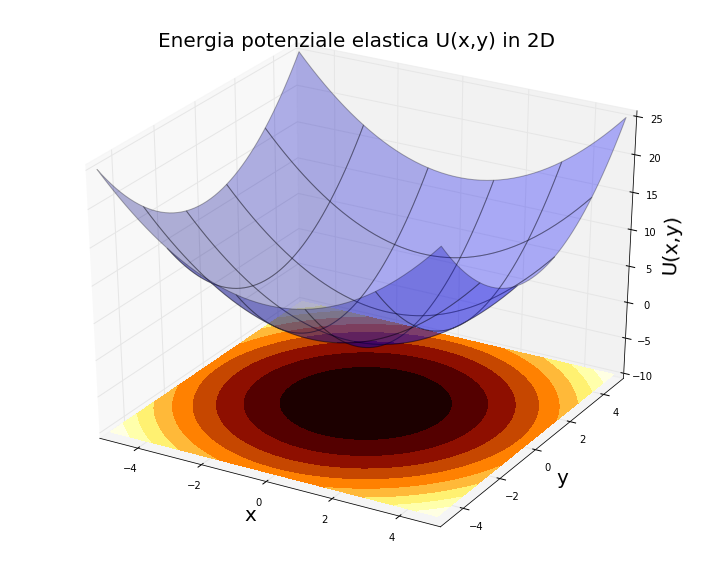

In [1]:
# Energia potenziale elastica nel piano

%pylab inline

from mpl_toolkits.mplot3d import axes3d

k=1                                   # N/m    costante elastica

a,b = -5,5                            # m      
x=linspace(a,b)                       # m      vettore contenente una successione di coordinate x equispaziate
y=linspace(a,b)                       # m      vettore contenenete una successione di coordinate y equispaziate
X,Y=meshgrid(x,y)                     #        matrici contenenti una griglia di coordinate x,y 

U=k*(X**2+Y**2)/2                     # J      Energia potenziale elastica        

fig = figure(figsize=(10,8))
ax = fig.gca(projection='3d')

ax.plot_surface(X, Y, U, alpha=0.3)
ax.contourf(X,Y,U, levels=linspace(0,U.max(),10), zdir='z', offset=-10, cmap=cm.afmhot)

fs=20
ax.set_xlabel('x',fontsize=fs);      ax.set_xlim(a,b)
ax.set_ylabel('y',fontsize=fs);      ax.set_ylim(a,b)
ax.set_zlabel('U(x,y)',fontsize=fs); ax.set_zlim(-10,U.max())
title('Energia potenziale elastica U(x,y) in 2D',fontsize=fs)
fig.tight_layout()

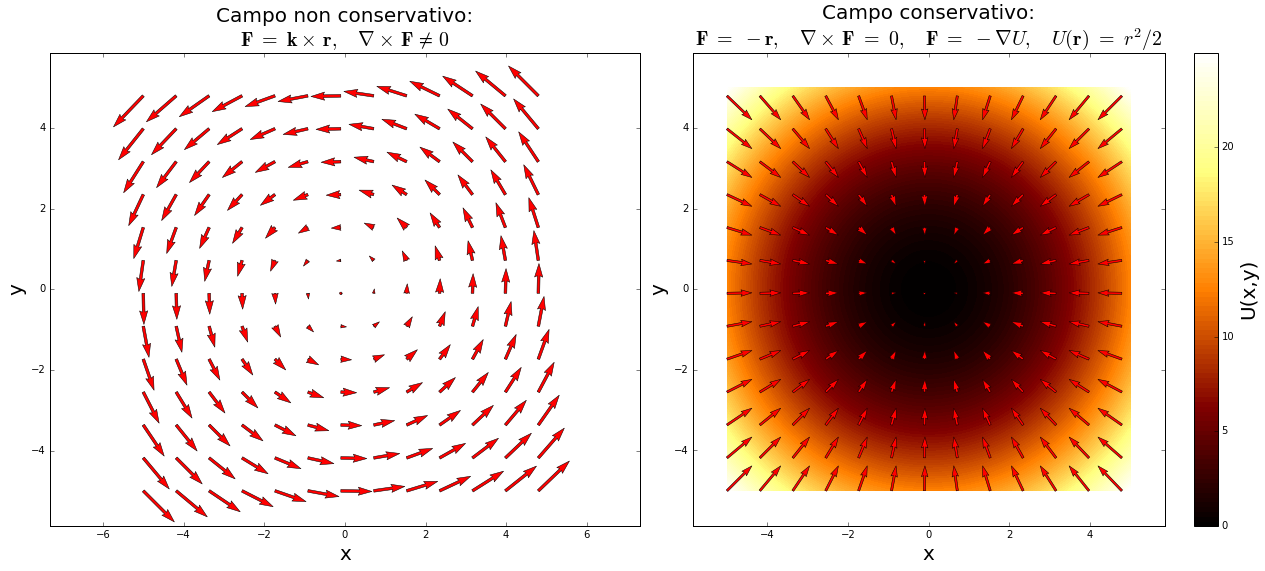

In [2]:
# Esempio di campo non conservativo e di campo conservativo (forza elastica, k=1)

skip=4
x,y=X[::skip,::skip],Y[::skip,::skip]

fig=figure(figsize=(18,8))

Fx, Fy = -y, x                  # Esempio: campo non conservativo

ax=fig.add_subplot(121)

quiver(x,y,Fx,Fy,color='r',edgecolors='k',linewidths=(.5,))
ax.set_xlabel('x',fontsize=fs);      ax.set_xlim(a,b)
ax.set_ylabel('y',fontsize=fs);      ax.set_ylim(a,b)
title('Campo non conservativo:\n'+
     r'$\mathbf{F}\ =\ \mathbf{k}\times\,\mathbf{r},\quad\nabla\times\,\mathbf{F}\ \ne\  0$',fontsize=fs)
axis('equal')
fig.tight_layout()

Fx, Fy = -x, -y                  # Esempio: campo conservativo

ax=fig.add_subplot(122)

contourf(X,Y,U,levels=linspace(0,U.max(),100),cmap=cm.afmhot)
cbar=colorbar()
cbar.set_ticks(linspace(0,20,5))
cbar.set_label('U(x,y)',fontsize=fs)
quiver(x,y,Fx,Fy,color='r',edgecolors='k',linewidths=(.5,))
ax.set_xlabel('x',fontsize=fs);      ax.set_xlim(a,b)
ax.set_ylabel('y',fontsize=fs);      ax.set_ylim(a,b)
title('Campo conservativo:\n'
    +r'$\mathbf{F}\ =\ -\mathbf{r},\quad\nabla\times\,\mathbf{F}\ =\ 0,\quad$'
    +r'$\mathbf{F}\ =\ -\nabla U,\quad U(\mathbf{r})\ =\ r^2/2$',fontsize=fs)
axis('equal')
fig.tight_layout()